In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
from matplotlib.lines import Line2D



In [2]:
confidential = open("spotify_eddie_confidential.txt","r")

In [3]:
string = confidential.read()

In [4]:
st = string.split('\n')

In [5]:
secrets_dict={}
for line in string.split('\n'):
    if len(line) > 0:
        secrets_dict[line.split(':')[0]]=line.split(':')[1]

In [6]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

In [7]:
df = sp.user_playlist_tracks("spotify", "0BUNSGihi2mrhQu3fPcVim")

In [145]:
# ''' What we need:
#  1) Get Playlist [x]
#  2) Get artist name from each song of the playlist
#  3) Get all albums from each of the artists                       #to do list credit to lord SEVEREIN
#  4) Get all songs from each of the albums
#  5) Get URI's for all the songs'''

In [9]:
df['items'][0]['track']['id']

'1SJ4ycWow4yz6z4oFz8NAG'

In [144]:
# for x in df['items']:
#     print(x['track']['id']) 

In [11]:
all_id = []
for x in df['items']:
    all_id.append(x['track']['id'])    #all 813 id's

In [12]:
# all audio features
#sp.audio_features(tracks=all_id)              #ignore this, as I have done it in a different way further down

In [13]:
#all_audio_features = pd.DataFrame(sp.audio_features(tracks=all_id))

In [15]:
#all_audio_features.head()

In [16]:
#all_audio_features.dtypes

In [17]:
#all_audio_features.columns

In [18]:
#sp.categories(limit=3)

In [19]:
df['total']

813

In [20]:
len(df['items'])

100

In [21]:
df.keys()

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

In [79]:
from random import randint
from time import sleep

def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
        sleep(randint(1,3))
    return tracks

In [81]:
all_tracks = get_playlist_tracks("0BUNSGihi2mrhQu3fPcVim")  #get playlist tracks
len(all_tracks)

813

In [118]:
all_tracks[0]['track']['artists'][0]['name']   #check name, track, artists 

'The Muppets'

In [25]:
def uris(all_tracks):
    uris = [all_tracks[i]['track']['uri'] for i in range(len(all_tracks))]   #uris
    return uris
all_uris = uris(all_tracks)

In [26]:
df_all_uris = pd.DataFrame(all_uris, columns=['uri'])      #uris data frame
df_all_uris.shape

(813, 1)

In [167]:
df_all_uris

,uri
0,spotify:track:1SJ4ycWow4yz6z4oFz8NAG
1,spotify:track:25U7raB3ZSszayTYClh4hF
2,spotify:track:04cdEVbQPb8BJb7593e5fO
3,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu
4,spotify:track:2pp3RfqX5cb1BAnmNi4Nej
...,...
808,spotify:track:6zSpb8dQRaw0M1dK8PBwQz
809,spotify:track:1A2rlbdSXZWyPXkEm3AXK5
810,spotify:track:6B89ADIwxCw60PHZN6Kdp4
811,spotify:track:7nXXIXFSyDDPlfzCW9bdAa


In [119]:
def all_artists(all_tracks):
    artist = [all_tracks[i]['track']['artists'][0]['name'] for i in range(len(all_tracks))]    #artists
    return artist  
all_artists = all_artists(all_tracks)

In [120]:
df_all_artists = pd.DataFrame(all_artists, columns=['artist'])         #artitst data frame
df_all_artists.shape

(813, 1)

In [168]:
df_all_artists

,artist
0,The Muppets
1,Israel Kamakawiwo'ole
2,Joey Ramone
3,Asaf Avidan & the Mojos
4,Louis Armstrong
...,...
808,Elton John
809,MAVV
810,Garfunkel and Oates
811,Shiny Toy Guns


In [86]:
def all_track_names(all_tracks):
    names = [all_tracks[i]['track']['name'] for i in range(len(all_tracks))]      #tracks
    return names
all_track_names = all_track_names(all_tracks)

In [88]:
#all_track_names

In [127]:
df_all_track_names = pd.DataFrame(all_track_names, columns=['name'])          #tracks data frame
df_all_track_names.shape

(813, 1)

In [169]:
df_all_track_names

,name
0,Rainbow Connection
1,Somewhere Over The Rainbow_What A Wonderful World
2,What a Wonderful World
3,One Day / Reckoning Song (Wankelmut Remix) [Ra...
4,What A Wonderful World - Single Version
...,...
808,Cold Heart - PNAU Remix
809,Everything That I Want
810,The Loophole
811,Major Tom (Coming Home) - Adam K & Soha Radio ...


In [131]:
features = [sp.audio_features(i) for i in (all_uris)]         # WARNING this takes long


In [132]:
def flatten(input_list):
    return [item for sublist in input_list for item in sublist]

In [171]:
features_new = flatten(features) #check first one
features_new[1]

{'danceability': 0.663,
 'energy': 0.168,
 'key': 0,
 'loudness': -13.725,
 'mode': 1,
 'speechiness': 0.0448,
 'acousticness': 0.928,
 'instrumentalness': 5.68e-05,
 'liveness': 0.361,
 'valence': 0.678,
 'tempo': 85.005,
 'type': 'audio_features',
 'id': '25U7raB3ZSszayTYClh4hF',
 'uri': 'spotify:track:25U7raB3ZSszayTYClh4hF',
 'track_href': 'https://api.spotify.com/v1/tracks/25U7raB3ZSszayTYClh4hF',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/25U7raB3ZSszayTYClh4hF',
 'duration_ms': 308027,
 'time_signature': 4}

In [134]:
#clean up everythang to make a final features data frame
danceability = [features_new[i]['danceability'] for i in range(len(features_new))]
energy = [features_new[i]['energy'] for i in range(len(features_new))]
key = [features_new[i]['key'] for i in range(len(features_new))]
loudness = [features_new[i]['loudness'] for i in range(len(features_new))]
mode = [features_new[i]['mode'] for i in range(len(features_new))]
speechiness = [features_new[i]['speechiness'] for i in range(len(features_new))]
acousticness = [features_new[i]['acousticness'] for i in range(len(features_new))]
instrumentalness = [features_new[i]['instrumentalness'] for i in range(len(features_new))]
liveness = [features_new[i]['liveness'] for i in range(len(features_new))]
valence = [features_new[i]['valence'] for i in range(len(features_new))]
tempo = [features_new[i]['tempo'] for i in range(len(features_new))]

In [135]:
df_all_features = pd.DataFrame.from_dict({'danceability':danceability, 'energy':energy, 'key':key, 'loudness':loudness, 'mode':mode, 'speechiness':speechiness, 'acousticness':acousticness, 'instrumentalness':instrumentalness, 'liveness':liveness, 'valence':valence, 'tempo':tempo})
df_all_features

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936
1,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005
2,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044
3,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012
4,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894
...,...,...,...,...,...,...,...,...,...,...,...
808,0.796,0.798,1,-6.312,1,0.0317,0.03400,0.000042,0.0952,0.942,116.032
809,0.635,0.516,3,-8.677,1,0.0341,0.12500,0.000000,0.1200,0.127,114.074
810,0.569,0.367,5,-5.178,1,0.0878,0.86200,0.000155,0.3370,0.823,169.768
811,0.732,0.764,10,-6.503,0,0.0631,0.16200,0.346000,0.3220,0.685,132.019


In [136]:
#concatenate everything together
df_complete = pd.concat([df_all_artists, df_all_track_names, df_all_uris, df_all_features], axis=1)

In [137]:
df_complete.shape

(813, 14)

In [138]:
df_complete.columns

Index(['artist', 'name', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'],
      dtype='object')

In [139]:
df_complete

,artist,name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,The Muppets,Rainbow Connection,spotify:track:1SJ4ycWow4yz6z4oFz8NAG,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936
1,Israel Kamakawiwo'ole,Somewhere Over The Rainbow_What A Wonderful World,spotify:track:25U7raB3ZSszayTYClh4hF,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005
2,Joey Ramone,What a Wonderful World,spotify:track:04cdEVbQPb8BJb7593e5fO,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044
3,Asaf Avidan & the Mojos,One Day / Reckoning Song (Wankelmut Remix) [Ra...,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012
4,Louis Armstrong,What A Wonderful World - Single Version,spotify:track:2pp3RfqX5cb1BAnmNi4Nej,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,Elton John,Cold Heart - PNAU Remix,spotify:track:6zSpb8dQRaw0M1dK8PBwQz,0.796,0.798,1,-6.312,1,0.0317,0.03400,0.000042,0.0952,0.942,116.032
809,MAVV,Everything That I Want,spotify:track:1A2rlbdSXZWyPXkEm3AXK5,0.635,0.516,3,-8.677,1,0.0341,0.12500,0.000000,0.1200,0.127,114.074
810,Garfunkel and Oates,The Loophole,spotify:track:6B89ADIwxCw60PHZN6Kdp4,0.569,0.367,5,-5.178,1,0.0878,0.86200,0.000155,0.3370,0.823,169.768
811,Shiny Toy Guns,Major Tom (Coming Home) - Adam K & Soha Radio ...,spotify:track:7nXXIXFSyDDPlfzCW9bdAa,0.732,0.764,10,-6.503,0,0.0631,0.16200,0.346000,0.3220,0.685,132.019


In [140]:
#drop the non-numericals prior to feeding the ML algorythm 
cluster = df_complete.drop(['artist','name','uri'], axis=1)

In [141]:
#scale and transform
scaler= StandardScaler().fit(cluster)
X_prep = scaler.transform(cluster)

In [142]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=1234)

In [143]:
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    486
1    286
2     41
dtype: int64

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

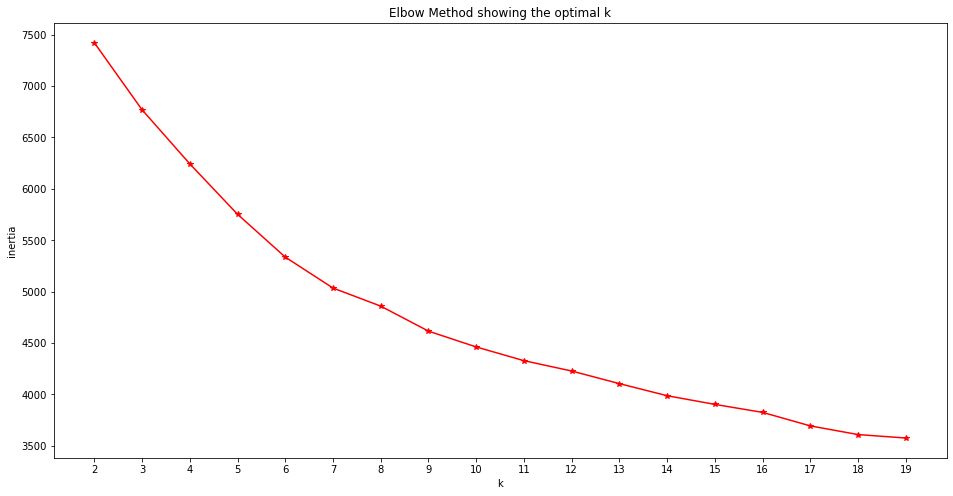

In [106]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'r*-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')    

In [107]:
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans.fit(X_prep)
clusters = kmeans.predict(X_prep)
pd.Series(clusters).value_counts().sort_index()

0    184
1    184
2    299
3    105
4     41
dtype: int64

In [108]:
clusters.shape

(813,)

In [109]:
kmeans.inertia_ 

5752.77607749044

In [110]:
kmeans = KMeans(n_clusters=4,
                init="random",
                n_init=50,  
                max_iter=10,
                tol=0,
                random_state=1234)
kmeans.fit(X_prep)

print(kmeans.inertia_)

6203.107006050915


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

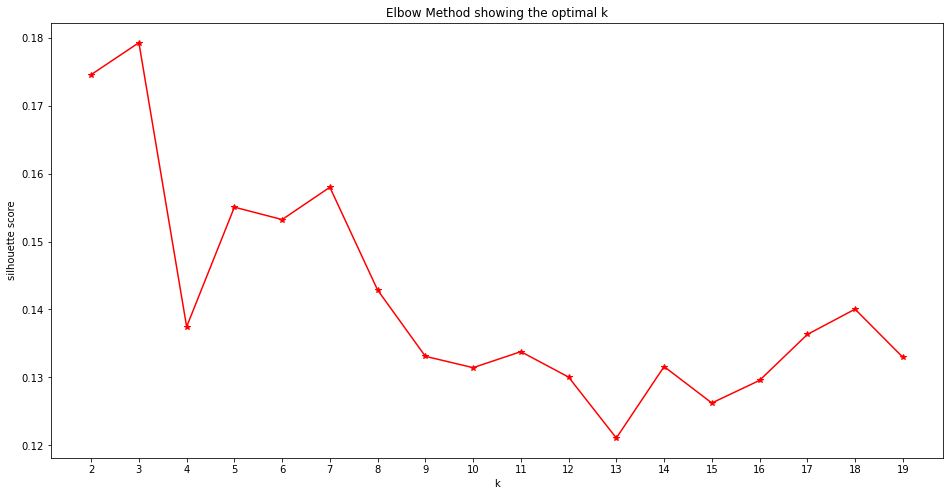

In [111]:
from sklearn.metrics import silhouette_score
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))                        #silhouette score is prediction, maximized for 3 clusters, higher score is better


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'r*-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

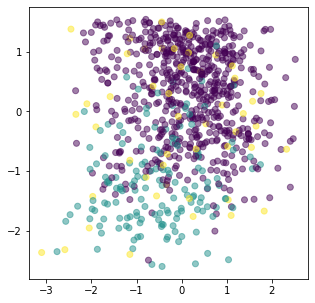

In [112]:
# ward linkage 
from sklearn import cluster, datasets
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='ward')
pred = agglomerative.fit_predict(X_prep)
plt.figure(figsize=(5, 5))
plt.scatter(X_prep[:, 0], X_prep[:, 1], c=pred,alpha=0.5)
plt.show()

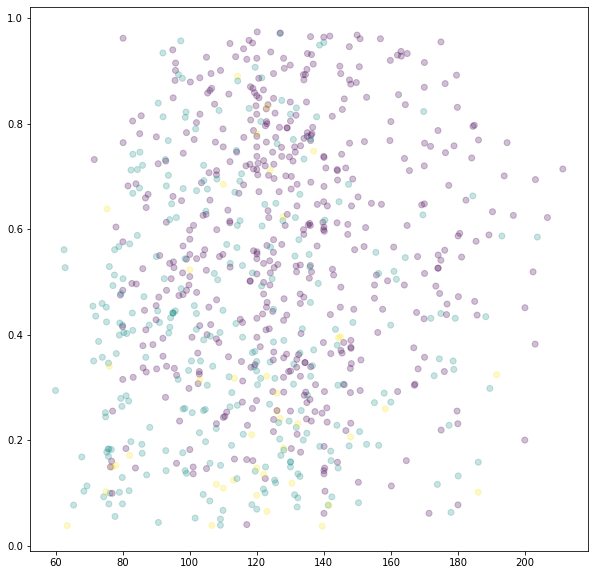

In [170]:
plt.figure(figsize=(10, 10))
plt.scatter(df_complete['tempo'], df_complete['valence'], c=clusters,alpha=0.25)
plt.show()

In [113]:
df_complete['cluster'] = clusters

In [114]:
#drop name
df_complete = df_complete.drop(['name'], axis=1)

In [115]:
df_complete

,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster
0,The Muppets,spotify:track:1SJ4ycWow4yz6z4oFz8NAG,0.526,0.413,9,-7.674,1,0.0278,0.42800,0.000000,0.1260,0.211,115.936,1
1,Israel Kamakawiwo'ole,spotify:track:25U7raB3ZSszayTYClh4hF,0.663,0.168,0,-13.725,1,0.0448,0.92800,0.000057,0.3610,0.678,85.005,1
2,Joey Ramone,spotify:track:04cdEVbQPb8BJb7593e5fO,0.422,0.878,5,-4.863,1,0.0442,0.00935,0.332000,0.2010,0.496,84.044,2
3,Asaf Avidan & the Mojos,spotify:track:5HSkycOEtb9iQ7cg1Oyqmu,0.821,0.676,3,-6.366,0,0.0547,0.18700,0.000100,0.0927,0.559,119.012,0
4,Louis Armstrong,spotify:track:2pp3RfqX5cb1BAnmNi4Nej,0.388,0.327,5,-12.522,1,0.0317,0.73200,0.001030,0.1500,0.222,107.894,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,Elton John,spotify:track:6zSpb8dQRaw0M1dK8PBwQz,0.796,0.798,1,-6.312,1,0.0317,0.03400,0.000042,0.0952,0.942,116.032,2
809,MAVV,spotify:track:1A2rlbdSXZWyPXkEm3AXK5,0.635,0.516,3,-8.677,1,0.0341,0.12500,0.000000,0.1200,0.127,114.074,2
810,Garfunkel and Oates,spotify:track:6B89ADIwxCw60PHZN6Kdp4,0.569,0.367,5,-5.178,1,0.0878,0.86200,0.000155,0.3370,0.823,169.768,3
811,Shiny Toy Guns,spotify:track:7nXXIXFSyDDPlfzCW9bdAa,0.732,0.764,10,-6.503,0,0.0631,0.16200,0.346000,0.3220,0.685,132.019,0


In [151]:
topsongs = pd.read_csv('C:\\Users\\eddie\\Desktop\\Ironhack\\week6\\week6 day3\\songs_top_100.csv').drop(['Unnamed: 0'],axis=1)

In [152]:
len(topsongs)

100

In [153]:
topsongs

,title,artist
0,All Too Well (Taylor's Version),Taylor Swift
1,Easy On Me,Adele
2,Stay,The Kid LAROI & Justin Bieber
3,Industry Baby,Lil Nas X & Jack Harlow
4,Smokin Out The Window,Silk Sonic (Bruno Mars & Anderson .Paak)
...,...,...
95,Moth To A Flame,Swedish House Mafia & The Weeknd
96,'Til You Can't,Cody Johnson
97,Woman,Doja Cat
98,Take My Breath,The Weeknd


In [ ]:
def what_am_i_doing_with_my_life():
    song =  str(input("Please pick a song or artist: "))
    for i in range(len(topsongs)):
        if topsongs['title'][i] == song:
            rand_num = randint(0,len(topsongs))
            return(print("You can also listen to: \"", topsongs['title'][rand_num], "\" by", topsongs['artist'][rand_num]))
        elif topsongs['artist'][i] == song:
            rand_num = randint(0,len(topsongs))
            return(print("You can also to listen to: \"", topsongs['title'][rand_num], "\" by", topsongs['artist'][rand_num]))
    return ("Not in top 100 List!")
what_am_i_doing_with_my_life()

In [124]:
def features_api(track, artist):
    track_id = sp.search(q='artist:' + artist + ' track:' + track, type='track')
    uri = track_id["tracks"]["items"][0]['id']
    features_api = sp.audio_features(uri)
    return features_api

In [64]:
def eddie_is_cool():
    from random import randint
    song_choice=input("pick song now: ")
    if len(song_choice)==0:
        print("just....why?")
    else: 
        song_ch=song_choice.lower() 
        filter_song=topsongs[(topsongs["title"].str.lower()).str.contains(song_ch)]

        if len(filter_song) == 0:
            print("NO")
            random_song2 = randint(0, len(topsongs)-1)
            print("check this out '" + df_complete["title"][random_song2] + "' by " + topsongs["artist"][random_song2])

        else:
            print("THIS SONG IS LIT")
            random_song = randint(0, len(topsongs)-1)
            print("you might also enjoy '" + topsongs["title"][random_song] + "' by " + topsongs["artist"][random_song])





In [ ]:
eddie_is_cool()


In [ ]:
print('Welcome Jan, Erin & Fred. This is the GNOD song recommender!')
answer = input('Do you want me to recommend a song?(yes/no) ').lower()

if answer == 'no':
    print('Too bad, you missed out on a great song!')

else:

    new_song = input("Enter song: ").lower()
    new_artist = input("Enter artist: ").lower()

    test_entry = sp.search(q=new_song, type='track')
    wrong_entry = test_entry["tracks"]["total"] 

    while wrong_entry == 0:
        print("Song does not exists, try another")
        new_song = input("Enter song: ").lower()
        new_artist = input("Enter artist: ").lower()
        test_entry = sp.search(q=new_song, type='track')
        wrong_entry = test_entry["tracks"]["total"]

    if new_song in list(top100['song_title']):
        recommendation_hot = random.choice(list(top100['song_title']))
        while recommendation_hot == new_song:
                recommendation_hot = random.choice(list(top100['song_title']))
                print('Your recommendation:', recommendation_hot)
    else:
        feature = features(new_song, new_artist)
        column = list(feature[0].keys())
        values = [list(feature[0].values())]
        df_new_song = pd.DataFrame(data = feature, columns = column)
        df_new_song = df_new_song.drop(['type','id','uri','track_href','analysis_url','time_signature'],axis=1)
        std_new_song = scaler.transform(df_new_song)
        new_cluster = kmeans.predict(std_new_song)
        df_cluster = cluster_df[cluster_df['cluster'] == list(new_cluster)[0]]
        
        recommendation = random.choice(list(df_cluster['song_and_artist']))
        url = df_cluster['url'][df_cluster['song_and_artist'] == recommendation].values[0]

        print('Your recommendation:',recommendation)
        print('URL:',url)

In [ ]:
#////////////////???????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????????

In [ ]:
def features_api(track, artist):
    track_id = sp.search(q='artist:' + artist + ' track:' + track, type='track')
    uri = track_id["tracks"]["items"][0]['id']
    features_api = sp.audio_features(uri)
    return features_api

In [ ]:
def what_am_i_doing_with_my_life():
    new_song = input("song now: ").lower()
    new_artist = input("artist now: ").lower()
        
    if new_song in np.array(topsongs['title']):
        return random.choice(np.array(topsongs['title']))
    else:
        print('error')
        
    print('Your recommendation is:',random.choice(list(df_complete['artist'])))
  